In [ ]:
%pip install transformers accelerate einops langchain

MIT License

Copyright (c) 2023 Pavel Shibanov [https://blog.experienced.dev](https://blog.experienced.dev/falcon-7b-instruct-the-open-source-chatgpt-alternative-with-langchain-on-google-colab/?utm_source=colab&utm_medium=notebook&utm_content=falcon-7b-instruct)

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

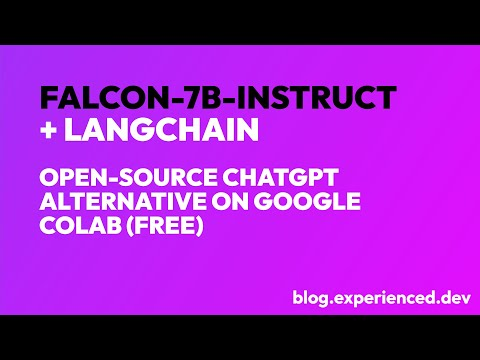

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('3yYTXHxCxz8', width="560", height="315")

In [2]:
!nvidia-smi

Mon Jan 15 16:41:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
from transformers import AutoTokenizer

model = "tiiuae/falcon-7b-instruct"

tokenizer = AutoTokenizer.from_pretrained(model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.73M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

In [ ]:
import torch
import transformers

pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto",
    max_length=200,
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    pad_token_id=tokenizer.eos_token_id,
)

config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

configuration_falcon.py:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- configuration_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.



modeling_falcon.py:   0%|          | 0.00/56.9k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- modeling_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin.index.json:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

In [ ]:
from langchain import HuggingFacePipeline

llm = HuggingFacePipeline(pipeline=pipeline)

In [ ]:
from IPython.core.display import display, HTML

def display_result(question, result):
    display(HTML(f"<h3>{question}</h3><p>{result}</p>"))

In [ ]:
question = "Write a dystopian story about a society where computers were banned."
result = llm(question)
display_result(question, result)

In [ ]:
from langchain import PromptTemplate, LLMChain

template = """Question: {question}
Answer: Let's think step by step."""
prompt = PromptTemplate(template=template, input_variables=["question"])
llm_chain = LLMChain(prompt=prompt, llm=llm)

In [ ]:
questions = [
    "Who proved the Efficient Market Hypothesis?",
    "Who disproved the Efficient Market Hypothesis?",
    "Who proved the Poincaré conjecture for n >= 5?",  # Stephen Smale
    "Who proved the Poincaré conjecture for n = 4?",  # Michael Freedman
    "Who proved the Poincaré conjecture for n = 3?",  # Grigori Perelman
    "Is the sum of all natural numbers equal to -1/12?",
]

In [ ]:
for question in questions:
    result = llm_chain.run(question)
    display_result(question, result)

In [ ]:
llm("Who was the first person to walk across the english channel?")

In [ ]:
llm("What is memetics?")

In [ ]:
text = """
🆕 1. Nothing is Original

“What has been is what will be,
and what has been done is what will be done;
there is nothing new under the sun.”
– Ecclesiastes 1.9. Christian Bible: Standard Version

You’ve likely heard someone smugly claim that “nothing is original” or there’s “nothing new under the sun”, but I promise you’re underestimating the extent to which this is true. We are less original than we think we are. The goal of this chapter is to reveal how much of creativity is just artful copying, so you give yourself permission to create.

📽️ 1.1. Reverse Engineering Hollywood
Tell me if you’ve heard this story before:
The young male protagonist encounters a mysterious stranger, who reveals a hidden, supernatural world.
Our unlikely hero encounters challenges, makes both allies and enemies, and falls in love with an unattainable person.
Just when you think he’s not going to make it, he discovers the power to overcome evil was inside him all along.
Defeat the bad guy. Save the world. Get the girl.
Star Wars. The Matrix. The Lion King. Harry Potter. The Lord of the Rings. Batman.
Central to all these movies, and countless more, is Joseph Campbell's Monomyth, or “Hero’s Journey” (Campbell 1991), perhaps the most popular plot in existence.

As well as being the template on which George Lucas based Star Wars, it was required reading at Disney during their “renaissance period” from 1989 to 1999 (Vogler 1985).
It’s not plagiarism, it’s pragmatism.
Stories teach us how to live our lives, encoding inherited wisdom, from those who lived to tell the tale.
The more useful the story, the more likely it is to be remembered and shared.
What could be more useful than the Monomyth? It provides guidance on how to live, act, and think in order to be a productive member of society.
These stories inspire us to believe that we have the power to change our situation, and give us hope.
Whether or not the story is true doesn't matter.
People raised on this myth are less likely to tolerate evil, more likely to do great things, and will aspire to a mate that’s out of their league.
It becomes a self-fulfilling prophecy.
That’s all civilization is: a necessary fiction we collectively choose to believe, that lets us bootstrap a far richer existence than we could accomplish alone.
Groups that tell more compelling stories are better able to collaborate and their culture tends to become dominant over those of groups with weaker stories, creating a survival-of-the-fittest scenario.
The best stories persist over time, passed down from generation to generation, reinvented with every retelling.
In order for their lessons to be impactful, stories must be remembered and recalled at the time they are most relevant. Given our limited brain capacity, there is a finite number of stories that are worth telling.
Humans have been trying to reverse-engineer what makes a good story at least as far back as Aristotle, with his three-act structure. According to Christopher Booker (Booker 2004) there have only been 7 stories ever told:
1. Overcoming the Monster (Jaws, Beowulf, King Kong)
2. Voyage and Return (Alice in Wonderland, The Time Machine, The Wizard of Oz)
3. Rags to Riches (Aladdin, Cinderella, Slumdog Millionaire)
4. The Quest (Lord of the Rings, The Iliad, Raiders of the Lost Ark)
5. Tragedy (Macbeth, Requiem for a Dream, Anna Karenina)
6. Comedy (Dumb and Dumber, A Midsummer Night’s Dream, The Big Lebowski)
7. Rebirth (Groundhog Day, A Christmas Carol, Beauty and the Beast)
William Foster-Harris asserted there were 3 basic plot patterns. Ronald Tobias identified 20 ‘master plots’. Georges Polti topped that with 36 ‘dramatic situations’.
So far only Kurt Vonnegut has had his theory fed into a computer.
Researchers at the University of Vermont (Reagan et al. 2016), inspired by Vonnegut’s master’s thesis “The Shapes of Stories”, coded the words of 1,737 fiction texts by emotion using machine learning, and found evidence of 6 core ‘shapes’.
Every successful myth, movie, book, game, or show you’ve ever known and loved, can be placed in one of a surprisingly small number of categories.
By categorizing stories in this manner, you can identify patterns that might have otherwise gone unnoticed.
While the tale of Cinderella may not seem to match Christianity's origin story, according to Vonnegut, "the tales were identical" (Flood 2016).
It starts with a staircase-like climb in good fortune with Cinderella’s fairy godmother – “[which] looks like the creation myth of virtually every society on earth” – deities imparting incremental gifts.
The stroke of midnight lines up directly with the famous line: “let there be light”. Cinderella’s curfew is a mirror image to Adam and Eve’s rejection from the Garden of Eden.

If this exercise seems academic, Vonnegut insists it's “the most popular story in our civilization”, and that “every time it’s retold, someone makes a million dollars.”
Hollywood has taken this lesson to heart.
If you look at the top 100 highest grossing films at the US box office in each year between 2005 and 2014 (1,000 films in total), only 38.5% were truly original, i.e. not a sequel, spin-off, remake, or retelling of an older story (Cherubini 2020).
The same is happening with TV shows, where about a third of the top 30 most-viewed shows are spin-offs or repeats of existing shows, as well as books, music, and video games (Mastroianni 2022).
“They already know these brands, and these combinations have worked on one generation and, if written properly, will work again…” explains Anita Busch of Deadline.
Many of the movies we believe to be original, are actually retellings of an older story.
The Lion King is Hamlet with Lions. Titanic is Romeo and Juliet on a boat. Avatar is Dances with Wolves but the Indians are blue aliens. Batman is Zorro in Manhattan. Iron Man is Batman in California.
There are certain story templates that are guaranteed to resonate, so long as you match the audience’s expectations.
As Blake Snyder says in “Save the Cat” (Snyder 2005), his book on screenwriting, “You can’t tell me any idea that isn’t like one, or dozens, found in the movie canon. Trust me, your movie falls into a category. And that category has rules that you need to know”.
The canonical example of a great story template is the movie Die Hard, which spawned 4 official sequels, but also became a popular recipe for others to replicate.
We've had Die Hard on a Battleship (Under Siege), Bus (Speed), Plane (Passenger 57), Train (“Under Siege 2”), Cruise Liner (Speed 2), Mountain (Cliffhanger), Prison (The Rock), School (Toy Soldiers), Mall (Point Blank), and a Skyscraper (Skyscraper).
We even had two Die Hard replicas both set in the White House, released within 3 months of each other (White House Down and Olympus Has Fallen). The latter has already spawned two sequels: London Has Fallen, and Angel Has Fallen.
In Hollywood this is such standard practice, that movies are often greenlighted based on their “high concept pitch”, for example Alien was “Jaws on a spaceship”. That movie was still plenty original, but drawing the analogy helped executives pattern match.
It’s not just plots that get recycled. Ever noticed how in Hollywood movies, the sky has a yellow tint when the scene is in Mexico? Mexico doesn’t really look that way.
It does in Hollywood films because we associate yellow tint with bygone eras, lawless westerns, hard lives, dusty towns, lack of modern technology.
Sicario. Traffic. Breaking Bad. Jason Bourne. James Bond. Whenever a character goes south of the border, watch the sky turn inexplicably yellow.
This trope arose thanks to the use of sepia to preserve old photographs, and because human skin tones are easier to work with in the yellow end of the color spectrum.
When film digitized and filmmakers could manipulate colors more easily, they jumped across the spectrum to blue, a complementary color that makes the scene “pop”.
This gave rise to a new trope: we now associate the color blue with progress, modern technology, cleanliness, science, and space travel.
Star Wars. Tron. Transformers. Minority Report. Iron Man. Almost every futuristic film has a blue background.
However, when the characters visit somewhere less technologically advanced, the sky turns yellow again. Tatooine is the Mexico of space.
In a related effect, Communist states are usually portrayed as monochrome, using a lack of color to visually reinforce a lack of individuality.
How do these tropes get agreed? Do filmmakers all hold a secret meeting where they dictate what colors they’re allowed to use in which situations?
No, they just watch a lot of movies.
In most of the movies they’ve seen – the successful ones anyway – these conventions were either established or followed.
They copy how things were done by their heroes.
It may not even be intentionally copying: when you’ve seen a lot of examples of doing something one way, doing it any other way just feels ‘wrong’, even if you don’t know why.
The convention sticks.
From all the infinite ways you could do something, choices get happily narrowed to the handful of ways it's been done before.
Break the rules at your peril.
It costs hundreds of millions of dollars to make a modern movie, and millions of people must be convinced to spend 2 hours of their lives and $10, plus popcorn.
Moviegoers are risk-averse. They have limited time for entertainment, so they choose the comfort of stories, actors, and brands they know.
Studios are more than happy to give them more of the same. "Risk aversion has really paid off, and studios and production companies have noticed this" says Walt Hickey, a pop culture expert at FiveThirtyEight (Cherubini 2020).
Studies show (Filiz-Ozbay and Ozbay 2007) that in conditions of uncertainty with a high penalty for being wrong, consumers act to minimize regret. Better to take a ‘good enough’ option, over a theoretical maximum they may fail to find.
Don’t blame Hollywood for being unoriginal. They’re giving the people what they want.
Consumers look for sensory cues to determine if we’re buying the right product, and regulate how they feel post-purchase.
These expectations are formed from our past experiences, contextual clues in our environment, and our understanding of popular culture.
Picture this scenario:
It’s Valentine’s Day and there’s a new movie out. You see an attractive couple smiling on the poster, one of whom you recognize as A-list comedic actor/hunk Ryan Reynolds.
There’s fireworks going off behind them, warm autumn colors, and the tagline reads “True Love Never Dies”.
Clearly a Romantic Comedy.
That’s either exactly what you’re looking for, or something to happily avoid, depending on your preferences and those of your date.

(Liao 2018)
If you’ve seen the movie Deadpool, you already know the punchline.
It’s not a Romantic Comedy at all: it’s a Superhero movie, and not the kind you’d take a date to see on Valentine’s Day (unless you share a twisted sense of humor).
In the very first scene one of the “bad guys” gets skewered with dual samurai swords by our anti-hero, who breaks the fourth wall to acknowledge the on-screen carnage: “some of the best love stories start with a murder”.
The misleading movie poster was a prank by star Ryan Reynolds to generate social media buzz for the movie, but it highlights something important about consumer behavior.
Valentine’s Day release date. Attractive actors smiling. Couples embracing. Fireworks in the background. Warm Autumn colors. “True Love Never Dies”.
These are all examples of “memes” – I don’t mean funny internet photos – any pattern that repeats itself over time in our culture.
Memes are mental shortcuts that help us identify and sort products into categories, deciding if we want to buy.
Man in a mask. Red spandex suit. Superhuman strength. Henchmen. Car chases. Explosions. Guns. These are the memes we’d normally associate with Superhero movies.
“People DO judge a book by its cover,” as Mike Markulla (mentor to Steve Jobs) wrote of Apple’s marketing philosophy, and they “will impute the desired qualities” based on how the products are presented (Saidi 2021).
Consumers form design opinions in as little as 17 milliseconds (Tuch et al. 2012), and first impressions are as much as 94% design related (Sillence et al. 2004).
Netflix found users spend 1.8 seconds on average considering each recommended title and thumbnail, and if they haven’t decided in 90 seconds they exit the app (Nelson 2016).
When a business transmits the wrong memes, they attract the wrong type of customers, and repel the customers they actually want.
Attracting the wrong customers leads to negative word of mouth, which is still the main factor behind 20-50% of all purchasing decisions (Bughin, Doogan, and Vetvik 2010).
However businesses can’t be wholly unoriginal. Eventually people get tired of always seeing the same thing. You have to know what to copy, and when to innovate.
"""

In [ ]:
template = """Summarize this text:
```{text}```
Summary:"""
prompt = PromptTemplate(template=template, input_variables=["text"])
llm_chain = LLMChain(prompt=prompt, llm=llm)

result = llm_chain.run(text)
display_result(template, result)